<a href="https://colab.research.google.com/github/SaswatD27/CS460-NISER-Fall-Semester-2021-22/blob/main/MyPerceptrons%20-%2023%20Sept%20'21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Me and My Three Brain Cells : Perceptrons!**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [72]:
db=np.genfromtxt('Iris1.csv',delimiter=',')#Checking whether a given flower is of the Iris Setosa species or not
db=db[1:]
print(db)

[[ 1.00e+00  5.10e+00  3.50e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 2.00e+00  4.90e+00  3.00e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 3.00e+00  4.70e+00  3.20e+00  1.30e+00  2.00e-01  1.00e+00]
 [ 4.00e+00  4.60e+00  3.10e+00  1.50e+00  2.00e-01  1.00e+00]
 [ 5.00e+00  5.00e+00  3.60e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 6.00e+00  5.40e+00  3.90e+00  1.70e+00  4.00e-01  1.00e+00]
 [ 7.00e+00  4.60e+00  3.40e+00  1.40e+00  3.00e-01  1.00e+00]
 [ 8.00e+00  5.00e+00  3.40e+00  1.50e+00  2.00e-01  1.00e+00]
 [ 9.00e+00  4.40e+00  2.90e+00  1.40e+00  2.00e-01  1.00e+00]
 [ 1.00e+01  4.90e+00  3.10e+00  1.50e+00  1.00e-01  1.00e+00]
 [ 1.10e+01  5.40e+00  3.70e+00  1.50e+00  2.00e-01  1.00e+00]
 [ 1.20e+01  4.80e+00  3.40e+00  1.60e+00  2.00e-01  1.00e+00]
 [ 1.30e+01  4.80e+00  3.00e+00  1.40e+00  1.00e-01  1.00e+00]
 [ 1.40e+01  4.30e+00  3.00e+00  1.10e+00  1.00e-01  1.00e+00]
 [ 1.50e+01  5.80e+00  4.00e+00  1.20e+00  2.00e-01  1.00e+00]
 [ 1.60e+01  5.70e+00  4.40e+00  1.50e+00  4.00e-01  1.

##**1. Normal Vanilla Perceptron**
###Training Algorithm

In [139]:
def perc_train(db):
  w=np.zeros(len(db[0])-1)
  G=[]
  a=0
  flag=0
  i=0
  epoch=0
  nu=0.2
  while(flag!=1):
    count=0
    for x in db:
      i+=1
      #print(x,i)
      a=np.dot(w,x[:-1])
      #print(a)
      if a*x[-1]<=0:
        count+=1
        w+=(nu*x[-1])*x[:-1]
    epoch+=1
    print("Epoch - ",epoch," done.","\n w =",w)
    G.append(w.copy())
    #print(G)
    if count==0:
      flag=1
  return [w,G]

###Prediction and Testing Functions

In [140]:
def perc_pred(w,x):
  #print(np.sign(np.dot(w,x)))
  return np.sign(np.dot(w,x))
def count_perc_acc(w,db):
  count=0
  for x in db:
    if x[-1]==perc_pred(w,x[:-1]):
      count+=1
  return count/len(db)

###Actual Training on the Dataset

In [141]:
w1=perc_train(db)
print(w1[0])

Epoch -  1  done. 
 w = [-10.    -0.38   0.06  -0.66  -0.24]
Epoch -  2  done. 
 w = [-5.    7.1   5.46  1.06 -0.14]
Epoch -  3  done. 
 w = [-7.8   7.62  6.18  0.82 -0.34]
Epoch -  4  done. 
 w = [-9.8   9.26  7.58  0.84 -0.5 ]
Epoch -  5  done. 
 w = [-9.   11.66  9.48  1.14 -0.64]
Epoch -  6  done. 
 w = [-10.2   13.02  10.74   0.96  -0.82]
Epoch -  7  done. 
 w = [-11.6   14.48  12.02   0.88  -0.96]
Epoch -  8  done. 
 w = [-5.6  16.82 13.92  1.06 -1.08]
Epoch -  9  done. 
 w = [-11.2   16.34  14.     0.32  -1.32]
Epoch -  10  done. 
 w = [-11.4   17.78  15.3    0.26  -1.44]
Epoch -  11  done. 
 w = [-9.4 19.3 16.6  0.2 -1.6]
Epoch -  12  done. 
 w = [-10.2   19.96  17.34  -0.18  -1.78]
Epoch -  13  done. 
 w = [-13.    20.34  18.02  -0.7   -2.  ]
Epoch -  14  done. 
 w = [-11.8   21.92  19.28  -0.76  -2.16]
Epoch -  15  done. 
 w = [-7.   23.28 20.58 -0.92 -2.3 ]
Epoch -  16  done. 
 w = [-12.    22.88  20.54  -1.54  -2.54]
Epoch -  17  done. 
 w = [-7.2  24.24 21.84 -1.7  -2.68]


###Testing the Accuracy of the Model
(Will be 1 anyway given that the training algorithm terminated)

In [142]:
acc_van=count_perc_acc(w1[0],db)
print(acc_van)

1.0


### Accuracy vs Number of Epochs Elapsed


In [170]:
G1=w1[1]
#print(G)
x=np.arange(len(G))
y=[count_perc_acc(G1[i],db) for i in range(len(G1))]
print(y)

[0.6666666666666666, 0.74, 0.7133333333333334, 0.7133333333333334, 0.7266666666666667, 0.72, 0.72, 0.8133333333333334, 0.74, 0.7466666666666667, 0.78, 0.7733333333333333, 0.7466666666666667, 0.7666666666666667, 0.8333333333333334, 0.7666666666666667, 0.8333333333333334, 0.7733333333333333, 0.84, 0.7733333333333333, 0.8533333333333334, 0.7866666666666666, 0.7733333333333333, 0.8266666666666667, 0.7733333333333333, 0.82, 0.9, 0.8133333333333334, 0.8733333333333333, 0.8, 0.8, 0.8, 0.8066666666666666, 0.8133333333333334, 0.8666666666666667, 0.8, 0.8, 0.8066666666666666, 0.8133333333333334, 0.82, 0.88, 0.8066666666666666, 0.8133333333333334, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.8266666666666667, 0.9, 0.826

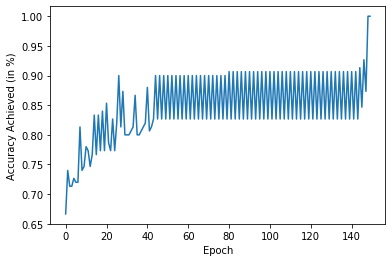

In [172]:
plt.plot(x,y)
plt.xlabel("Epoch")
plt.ylabel("Accuracy Achieved (in %)")
plt.show()


Gradually makes its way to termination, accuracy oscillates a bit between updates, but it does achieve 100% accuracy. Hallelujah!

##**2. Voted Perceptron**
###Training Algorithm

In [161]:
def voted_perc_train(db):
  W=[]
  G=[]
  w=np.zeros(len(db[0])-1)
  a=0
  flag=0
  i=0
  epoch=0
  nu=0.2
  while(flag!=1):
    count=0
    c=0
    for x in db:
      i+=1
      #print(x,i)
      a=np.dot(w,x[:-1])
      #print(a)
      if a*x[-1]>0:
        c+=1
      else:
        count+=1
        W.append([w.copy(),c])
        w+=(nu*x[-1])*x[:-1]
    epoch+=1
    print("Epoch - ",epoch," done.","\n w =",w)
    G.append(W.copy())
    if count==0:
      flag=1
  return [W,G]

###Prediction and Testing Functions

In [162]:
def voted_perc_pred(W,x):
  sum1=0
  for i in range(len(W)):
    sum1+=(W[i][1]*np.dot(W[i][0],x))
  return np.sign(sum1)

def count_voted_perc_acc(W,db):
  count=0
  for x in db:
    if x[-1]==voted_perc_pred(W,x[:-1]):
      count+=1
  return count/len(db)

###Actual Training on the Dataset

In [163]:
W1=voted_perc_train(db)
print(W1[0])

Epoch -  1  done. 
 w = [-10.    -0.38   0.06  -0.66  -0.24]
Epoch -  2  done. 
 w = [-5.    7.1   5.46  1.06 -0.14]
Epoch -  3  done. 
 w = [-7.8   7.62  6.18  0.82 -0.34]
Epoch -  4  done. 
 w = [-9.8   9.26  7.58  0.84 -0.5 ]
Epoch -  5  done. 
 w = [-9.   11.66  9.48  1.14 -0.64]
Epoch -  6  done. 
 w = [-10.2   13.02  10.74   0.96  -0.82]
Epoch -  7  done. 
 w = [-11.6   14.48  12.02   0.88  -0.96]
Epoch -  8  done. 
 w = [-5.6  16.82 13.92  1.06 -1.08]
Epoch -  9  done. 
 w = [-11.2   16.34  14.     0.32  -1.32]
Epoch -  10  done. 
 w = [-11.4   17.78  15.3    0.26  -1.44]
Epoch -  11  done. 
 w = [-9.4 19.3 16.6  0.2 -1.6]
Epoch -  12  done. 
 w = [-10.2   19.96  17.34  -0.18  -1.78]
Epoch -  13  done. 
 w = [-13.    20.34  18.02  -0.7   -2.  ]
Epoch -  14  done. 
 w = [-11.8   21.92  19.28  -0.76  -2.16]
Epoch -  15  done. 
 w = [-7.   23.28 20.58 -0.92 -2.3 ]
Epoch -  16  done. 
 w = [-12.    22.88  20.54  -1.54  -2.54]
Epoch -  17  done. 
 w = [-7.2  24.24 21.84 -1.7  -2.68]


###Testing the Accuracy of the Model

In [165]:
acc_van=count_voted_perc_acc(W1[0],db)
print(acc_van)

0.98


### Accuracy vs Number of Epochs Elapsed


In [173]:
G2=W1[1]
#print(G)
x=np.arange(len(G2))
y=[count_voted_perc_acc(G[i],db) for i in range(len(G2))]
print(y)

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3933333333333333, 0.7933333333333333, 0.94, 0.9266666666666666, 0.9266666666666666, 0.9533333333333334, 0.9466666666666667, 0.94, 0.9466666666666667, 0.9333333333333333, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.96, 0.96, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.98, 0.98, 0.98, 0.98, 0.98, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.96666666666

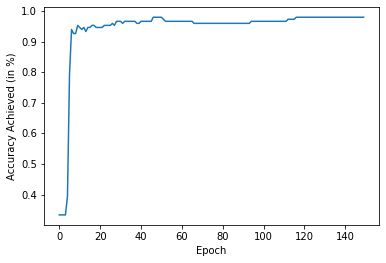

In [174]:
plt.plot(x,y)
plt.xlabel("Epoch")
plt.ylabel("Accuracy Achieved (in %)")
plt.show()

The exact opposite of a sleeper hit: at least in this situation, it shot up and didn't nearly oscillate as much but it stabilised towards the end.

Didn't give us a cent percent accuracy, but at 98%, it's not half bad. Might be due to the entire voting process.

Compared to the normal vanilla perceptron, of course this took the same number of epochs to terminate,but it approached termination much faster than the former in initial stages, and did not nearly oscillate at much, achieving near perfect accuracy very early on.

Suffice it to say that the voting process definitely works wonders.

(Note: I used a learning rate of 0.2 but that can be turned up to 1 of course.)